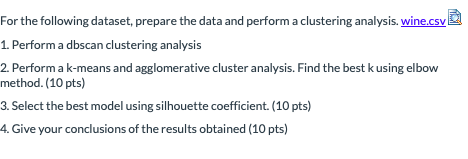

The required libraries were first loaded:

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import *
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.metrics.cluster import homogeneity_score
from sklearn.datasets import make_blobs
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The dataset was imported and it was spotted right away that it contains 2 columns with empty values. 

In [31]:
data=pd.read_csv('/content/drive/MyDrive/wine.csv',sep=",")
data=pd.DataFrame(data)
display(data)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Unnamed: 13,Unnamed: 14
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,NaN,
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,NaN,
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,NaN,
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,NaN,NaN
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,NaN,NaN
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,NaN,NaN
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,NaN,NaN
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,NaN,NaN


Information about the dataset was retrieved before applying any model. As it can be observed below, it contains three different types of variables and the last two columns are practically full of null objects, which means that they can be dropped. 

In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Unnam

The new dataset "data2" now contains only the variables that will be used to perform the clustering analyses. 

In [33]:
data2=data.drop(['Unnamed: 13', 'Unnamed: 14'], axis = 1)
display(data2)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


An analysis of the data was performed to understand its behaviour. As it can be observed in the "mean", "min" and "max" rows, the data variability is high, therefore, a standarization process needs to be carried out before continuing with the process.

In [34]:
display(data2.describe()) #it can be observed that the data has a lot of variability, therefore it should be standarized

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [35]:
#Data normalization
WineNorm=(data2-data2.min())/(data2.max()-data2.min())
WineNorm

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


After normalizing the data, we can now observe that we have a minimum value of 0 and a maximum value of 1 for every variable. 

In [36]:
WineNorm.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


A clustering analysis was performed through three different methods: KMeans, Agglomerative Cluster Analysis, and DBSCAN.

## **KMeans Model**

Since we do not know how many clusters our data possesses (i.e, how many types of wines it describes) the optimal number of clusters will be determined through the Elbow Method before performing the KMeans clustering analysis. 

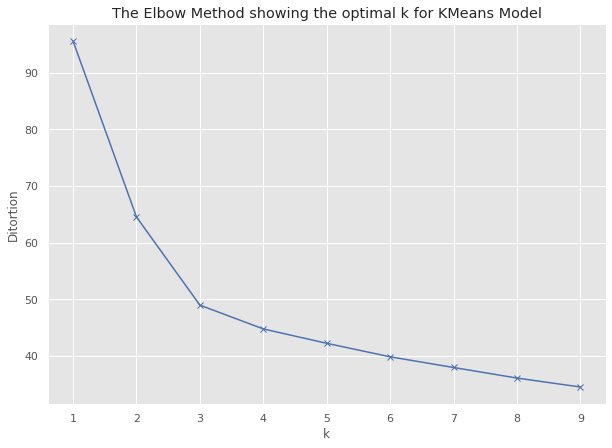

In [37]:
#busco cantidad óptima de clusters a usar

distortions= [] # this corresponds to the calculation of the within clusters sum of space (wcss)
K=range(1,10)
for k in K:
  kmeanModel=KMeans(n_clusters=k)
  kmeanModel.fit(WineNorm)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Ditortion') #wcss = indicador de qué tan similares son los individuos dentro de los clusters
plt.title('The Elbow Method showing the optimal k for KMeans Model')
plt.show()

#El valor ideal es 3 ya que wcss dejó de disminuir de manera drástica en ese punto. 

The figure above, generated through the Elbow Method, shows that 3 is the ideal number of clusters that should be used to apply the KMeans Model. This was concluded since the graph shows that the rate in which the within clusters sum of space (wcss) is reduced, lowers significantly at k=3. 

Now that a number of clusters has been obtained, it is possible to proceed to the application of the KMeans Model.

In [38]:
#Now that the number of clusters is known, the KMeans Method can be applied to the normalized dataset:

clustering=KMeans(n_clusters=3)
clustering.fit(WineNorm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
#Since the result of the clusters is saved as a label, a column representing the clusters was added to the original dataset.
data2['KMeans_Clusters']=clustering.labels_  
data2
#An interpretation of these clusters could be that they correspond to different types of wine according to their composition. 

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,KMeans_Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In ordert to visualize the obtained clusters we can run a PCA to reduce the dataset into two components that can be easily plotted. 

In [40]:
#PCA Analysis
from sklearn.decomposition import PCA #utilizo PCA para reducir 

pca=PCA(n_components=2) #indico que quiero los dos componentes principales
pcawine=pca.fit_transform(WineNorm)
pcawine_df=pd.DataFrame(data=pcawine, columns= ['Componente_1', 'Componente_2'])
pca_nombres_wine=pd.concat([pcawine_df, data2[['KMeans_Clusters']]], axis=1) #pd.concat agrega la columna

pca_nombres_wine

#As it can be observed below, now we have a data framework composed of two components that describe de dataset and their 
#corresponding clusters. 

,Componente_1,Componente_2,KMeans_Clusters
0,-0.706336,-0.253193,0
1,-0.484977,-0.008823,0
2,-0.521172,-0.189187,0
3,-0.821644,-0.580906,0
4,-0.202546,-0.059467,0
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


Now that a data framework cointaing the two main components of the dataset and their corresponding clusters has been obtained, these can be plotted to visualize them.

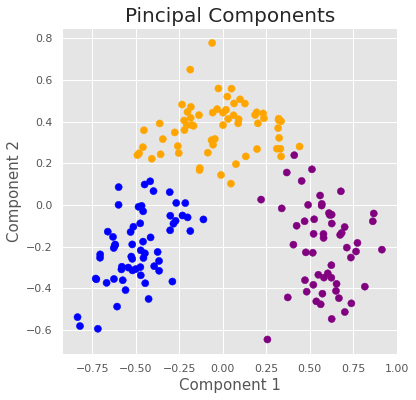

In [41]:
#Plot of the principal components, colored according to the cluster to which they belong. 

fig=plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize=15)
ax.set_ylabel('Component 2', fontsize=15)
ax.set_title('Pincipal Components', fontsize=20)

color_theme=np.array(['blue', 'purple', 'orange'])
ax.scatter(x=pca_nombres_wine.Componente_1, y=pca_nombres_wine.Componente_2, c=color_theme[pca_nombres_wine.KMeans_Clusters], s=50)
plt.show() #it can be observed that, in general, the clusters are well defined. 

From the Figure above it can be observed that, in general, the clusters have been well defined.

Afterwards, the silhouette coefficient was calculated to evaluate the model. This coefficient measures the similarity of an object to its own cluster, compared to other clusters.

In [42]:
silhouette_score(WineNorm, clustering.labels_)

0.3013463273503232

A silhouette score of ~0.3 was obtained. Since this score rages from -1 to 1 (being 1 the best score). It can be stated that this result is acceptable, although there might be some data overlapping between clusters (coefficients closer to zero indicate overlapping clusters). 

## **DBSCAN Clustering Analysis**

A DBSCAN Clustering Analysis was also performed. Since the data had already been analysed and normalized, it was feasible to procede directly to the application of the model. Eps=0.5 was chosen since it is the default value, and a minimun of ten samples was assigned since it showed a highest silhouette score when compared to other amounts. 

In [43]:
dbsc = DBSCAN(eps = 0.5, min_samples = 10).fit(WineNorm)

In [44]:
silhouette_score(WineNorm, dbsc.labels_) #score de DBSCAN

0.20409978452740918

## **Agglomerative Clustering**

An Agglomerative Clustering Analysis was also applied directly to the normalized data. The silhouette score was calculted for the model when two and three clusters were used. The result obtained was practically the same (~0.29). The score was slightly higher when 2 clusters were used, which can be attributed to slightly less clustering overlapping. However, we know that taking into account the characteristics of the dataset, three is the optimal number of clusters to use.  

In [45]:
ac2=AgglomerativeClustering(n_clusters=2).fit(WineNorm) #score Agglomerative 2 clusters
silhouette_score(WineNorm, ac2.labels_)

0.29666794582183303

In [46]:
ac3=AgglomerativeClustering(n_clusters=3).fit(WineNorm) #score Agglomerative 3 clusters
silhouette_score(WineNorm, ac3.labels_)

0.2948290632158541

Since the Elbow Method can only be applied when the KMeans model is used, a Dendogram was plotted to corroborate that three is the optimal number of clusters. A dendogram is a tree-shaped diagram that represents every merge occured during the application of the model. The x-axis shows all the points contained in the dataset, and the y-axis represents the distance between these points. The longer the vertical lines are, the bigger the distance between the points is. 

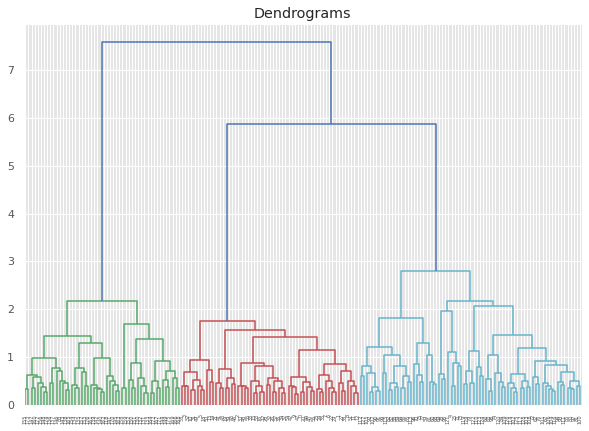

In [47]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(WineNorm, method='ward'))

The number of clusters is calculated by drawing a line across the tallest vertical line. The number of clusters corresponds then to the number of vertical lines that the new horizontal line passes through. As shown in the figure below, there are three clusters. 


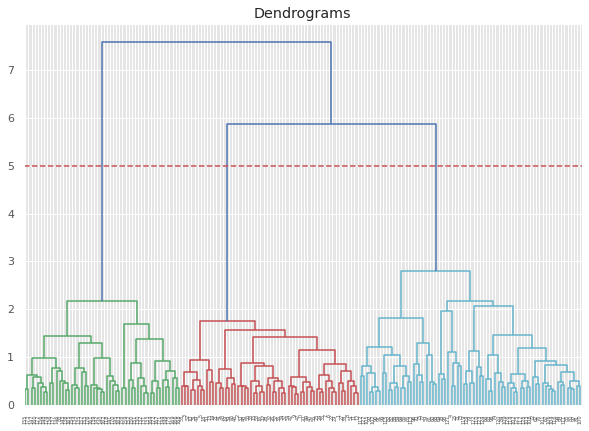

In [48]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(WineNorm, method='ward'))
plt.axhline(y=5, color='r', linestyle='--') #number of clusters correspond to the number of vertical lines cut by the threshold

## **Conclusions**

According to the obtained results, we can conclude that the dataset describes three diferent types of wine by analysing their chemical compositions. This was shown both by the Elbow Method and the generated Dendogram. Furthermore, the silhouette scores of each model were calculated. Eventhough they are similar between each other, **the KMeans Model showed to be more suitable to process this data**. This is probably due to the fact that this model performs a better measurement of the similarities between each object. The DBSCAN model scored the lowest in the silhouette coefficient, probably because this model is a density-based method and should also be specified a minimum number of samples for a region to be considered dense, as well of an eps, which in some cases can be harder to determine in comparison to a number of clusters in the case of the other two methods. 